In [27]:
import numpy as np          # 📊 NumPy : manipulation efficace de tableaux/matrices et calculs numériques
import pandas as pd         # 🗃️ Pandas : manipulation et analyse de données sous forme de DataFrame
import matplotlib.pyplot as plt  # 📈 Matplotlib : création de graphiques statiques (plots, histogrammes…)
import seaborn as sns       # 🎨 Seaborn : visualisation statistique plus jolie et facile (basé sur matplotlib)
import warnings             # ⚠️ Warnings : gérer et filtrer les avertissements Python

# Configuration
warnings.filterwarnings('ignore')          # Ignorer les avertissements pour un affichage plus propre
plt.rcParams['figure.figsize'] = (10, 6)   # Définir la taille par défaut des figures matplotlib
sns.set_style('whitegrid')                 # Style Seaborn : fond blanc avec grille
RANDOM_STATE = 42                           
np.random.seed(RANDOM_STATE)              

print('✅ Configuration terminée !')
print(f'NumPy: {np.__version__}')
print(f'Pandas: {pd.__version__}')



✅ Configuration terminée !
NumPy: 2.1.3
Pandas: 2.2.3


In [28]:
# Charger le fichier CSV
df = pd.read_csv("compas.csv")
# Obtenir le nombre de lignes et de colonnes
print(df.shape)   # retourne (n_lignes, n_colonnes)
# Avoir plus d’infos détaillées
print(df.info())


(6172, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6172 entries, 0 to 6171
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Number_of_Priors      6172 non-null   int64
 1   score_factor          6172 non-null   int64
 2   Age_Above_FourtyFive  6172 non-null   int64
 3   Age_Below_TwentyFive  6172 non-null   int64
 4   African_American      6172 non-null   int64
 5   Asian                 6172 non-null   int64
 6   Hispanic              6172 non-null   int64
 7   Native_American       6172 non-null   int64
 8   Other                 6172 non-null   int64
 9   Female                6172 non-null   int64
 10  Misdemeanor           6172 non-null   int64
 11  Two_yr_Recidivism     6172 non-null   int64
dtypes: int64(12)
memory usage: 578.8 KB
None


In [29]:
# Nombre de récidivistes et non-récidivistes
print(df['Two_yr_Recidivism'].value_counts())

# Proportion de récidivistes et non-récidivistes
print(df['Two_yr_Recidivism'].value_counts(normalize=True))

Two_yr_Recidivism
0    3363
1    2809
Name: count, dtype: int64
Two_yr_Recidivism
0    0.54488
1    0.45512
Name: proportion, dtype: float64


In [30]:

print(df.dtypes)

Number_of_Priors        int64
score_factor            int64
Age_Above_FourtyFive    int64
Age_Below_TwentyFive    int64
African_American        int64
Asian                   int64
Hispanic                int64
Native_American         int64
Other                   int64
Female                  int64
Misdemeanor             int64
Two_yr_Recidivism       int64
dtype: object


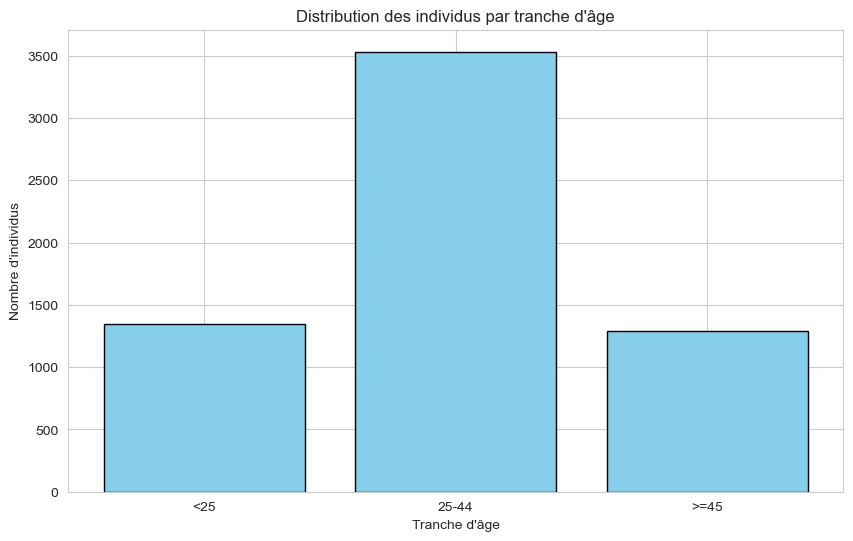

In [31]:
tranches = {
    "<25": df['Age_Below_TwentyFive'].sum(),
    "25-44": ((df['Age_Below_TwentyFive'] == 0) & (df['Age_Above_FourtyFive'] == 0)).sum(),
    ">=45": df['Age_Above_FourtyFive'].sum()
}

# Créer le graphique
plt.bar(tranches.keys(), tranches.values(), color='skyblue', edgecolor='black')
plt.title("Distribution des individus par tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Nombre d'individus")
plt.show()

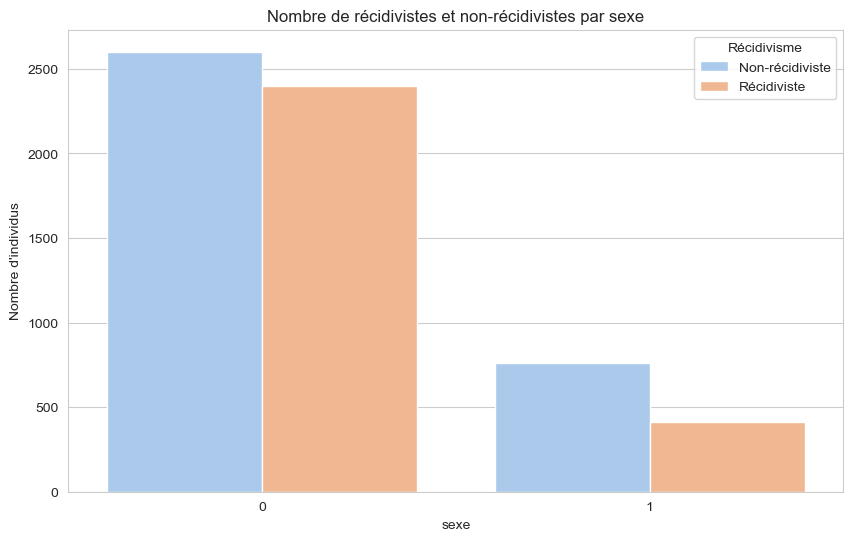

In [64]:
# Créer une colonne 'Sexe' pour plus de lisibilité
#df['Sexe'] = df['Female'].replace({0: 'Homme', 1: 'Femme'})

# Histogramme : nombre de récidivistes par sexe
sns.countplot(x='Female', hue='Two_yr_Recidivism', data=df, palette='pastel')
plt.title("Nombre de récidivistes et non-récidivistes par sexe")
plt.xlabel("sexe")
plt.ylabel("Nombre d'individus")
plt.legend(title='Récidivisme', labels=['Non-récidiviste', 'Récidiviste'])
plt.show()

In [33]:
# Nombre de valeurs manquantes par colonne
print(df.isnull().sum())

Number_of_Priors        0
score_factor            0
Age_Above_FourtyFive    0
Age_Below_TwentyFive    0
African_American        0
Asian                   0
Hispanic                0
Native_American         0
Other                   0
Female                  0
Misdemeanor             0
Two_yr_Recidivism       0
dtype: int64


In [34]:
# Vérification globale : y a-t-il au moins une valeur manquante ?
print(df.isnull().values.any())

False


In [35]:
from sklearn.model_selection import train_test_split

X = df.drop("Two_yr_Recidivism", axis=1)
y = df["Two_yr_Recidivism"]

# TODO: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Taille du train :", X_train.shape)
print("Taille du test  :", X_test.shape)

Taille du train : (4320, 11)
Taille du test  : (1852, 11)


In [36]:
X_train.head()



,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
6155,0,0,0,0,1,0,0,0,0,0,1
2370,0,0,0,1,0,0,1,0,0,0,0
2706,3,1,0,1,0,0,0,0,1,0,1
326,0,0,1,0,0,0,0,0,0,1,1
5780,0,0,1,0,0,0,0,0,1,0,1


In [58]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)

acc_lg = accuracy_score(y_test, y_pred_lg)
f1_lg = f1_score(y_test, y_pred_lg)
y_pred_proba_lg = lg.predict_proba(X_test)[:, 1]
auc_lg = roc_auc_score(y_test, y_pred_proba_lg)

print(f"Accuracy : {acc_lg:.4f}")
print(f"F1-Score : {f1_lg:.4f}")
print(f"AUC : {auc_lg:.4f}")


Accuracy : 0.6825
F1-Score : 0.6202
AUC : 0.7376


Modèle KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

print(f"Accuracy : {acc_knn:.4f}")
print(f"F1-Score : {f1_knn:.4f}")
print(f"AUC : {auc_knn:.4f}")

Accuracy : 0.6463
F1-Score : 0.5974
AUC : 0.6908


SVM

In [60]:

from sklearn.svm import SVC
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
y_pred_proba_svm = svm.predict_proba(X_test)[:, 1]
auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

print(f"Accuracy : {acc_svm:.4f}")
print(f"F1-Score : {f1_svm:.4f}")
print(f"AUC : {auc_svm:.4f}")

Accuracy : 0.6749
F1-Score : 0.5916
AUC : 0.7272


RANDOM FOREST

In [61]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Accuracy : {acc_rf:.4f}")
print(f"F1-Score : {f1_rf:.4f}")
print(f"AUC : {auc_rf:.4f}")


Accuracy : 0.6631
F1-Score : 0.5990
AUC : 0.7007


XGBOOST 

In [62]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [63]:

from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, random_state=42, verbose=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print(f"Accuracy : {acc_xgb:.4f}")
print(f"F1-Score : {f1_xgb:.4f}")
print(f"AUC : {auc_xgb:.4f}")

Accuracy : 0.6728
F1-Score : 0.6080
AUC : 0.7215
